In [2]:
from création_data import param_Dataset
import fonction_model as f
import fonctions_ss as fss
from IPython.display import display, Audio
from scipy.io.wavfile import write
import pickle

In [2]:
Fe = 2**14

# Synthèse des sons...

In [6]:
Fichier = "1ier_data_set/medium_1/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = False,
                                             acier_1C = True,
                                             acier_2C = False, 
                                             medium_1T = True, 
                                             medium_2T = False, 
                                             metal_T = False,
                                             plexi_T = False)

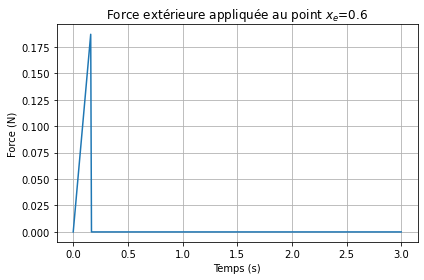

/Users/bigand/Desktop_bis/M2 - Codes/PAM/ATIAM-PAM-AnalyseInstruments/Data/fonction_model.py:287: RuntimeWarning: invalid value encountered in matmul
  q_dd_temp[:,i+1] = W @  q_pour_f[:,i+1]
/Users/bigand/Desktop_bis/M2 - Codes/PAM/ATIAM-PAM-AnalyseInstruments/Data/fonction_model.py:289: RuntimeWarning: invalid value encountered in add
  q_d_temp = q_d_temp + 0.5 * h * (q_dd_temp[:,i] + q_dd_temp[:,i+1])
/Users/bigand/Desktop_bis/M2 - Codes/PAM/ATIAM-PAM-AnalyseInstruments/Data/fonction_model.py:294: RuntimeWarning: invalid value encountered in matmul
  F_c = Z @ q_pour_f
/Users/bigand/Desktop_bis/M2 - Codes/PAM/ATIAM-PAM-AnalyseInstruments/Data/fonction_model.py:300: RuntimeWarning: invalid value encountered in matmul
  FS_NxS_Nt = phiS_Nx_NmS[-1,:] @ FS


[0.00105008 0.0003745  0.00024131 0.00018654 0.00015864 0.00014353
 0.00013582 0.00013297 0.00013363 0.00013705 0.00014272 0.00015034
 0.00015968 0.00017059 0.00018295 0.00019668 0.0002117  0.00022796
 0.00024542 0.00026403 0.00028377 0.00030459 0.00032649 0.00034942
 0.00037338 0.00039833 0.00042426 0.00045114 0.00047897 0.00050771
 0.00053736 0.0005679  0.0005993  0.00063154 0.00066463 0.00069852
 0.00073321 0.00076869 0.00080492 0.0008419  0.00087961 0.00091803
 0.00095714 0.00099692 0.00103736 0.00107845 0.00112016 0.00116247
 0.00120537 0.00124884 0.00129287 0.00133743 0.00138251 0.0014281
 0.00147416 0.0015207  0.00156769 0.00161511 0.00166295 0.00171119
 0.00175981 0.0018088  0.00185815 0.00190783 0.00195783 0.00200813
 0.00205873 0.00210959 0.00216072 0.00221209 0.00226368 0.00231549
 0.0023675  0.0024197  0.00247206]


In [4]:
N_sample = 1
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    art_acc, art_pos, art_fchev = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)
    ss_simu, phiB_NxNy_NmB = fss.Main_ss(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe, obs="acc")
    # write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [5]:
display(Audio(ss_simu, rate=Fe))

# Chargement de la mesure

In [6]:
from scipy.io import wavfile, loadmat
C1P1mat = loadmat("../../Mesures/Mesures_2023.01.27_LAM_normalise/Medium_1/Corde_Acier/C_3_P_1.mat")
acc = C1P1mat["acc_t"].reshape(-1)
fs2 = int(C1P1mat["fs"].reshape(-1))

# Comparaison fréquentielle

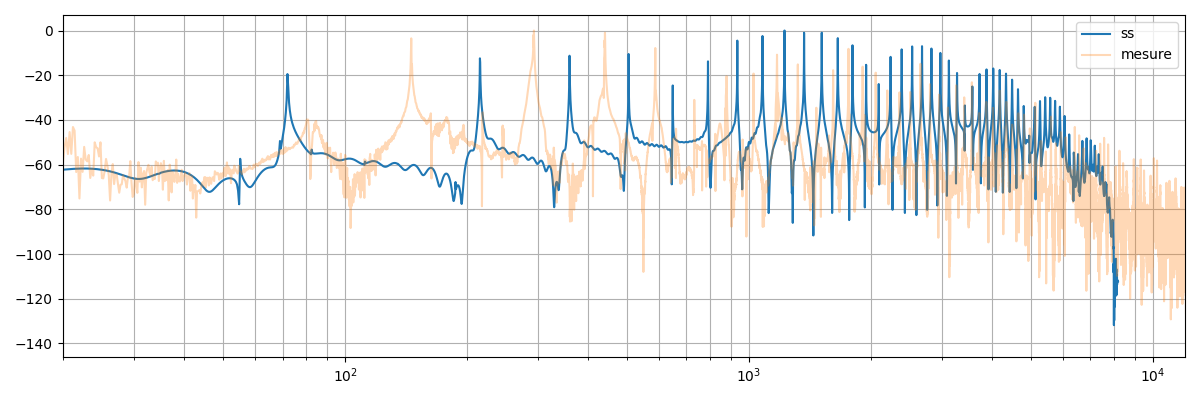

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

fs = Fe
Nfft = len(ss_simu)
Y = np.fft.rfft(ss_simu, Nfft)
Y = np.abs(Y)/np.max(np.abs(Y))
fy = np.fft.rfftfreq(Nfft,1/fs)

Nfft = len(acc)
Y2 = np.fft.rfft(acc, Nfft)
Y2 = np.abs(Y2)/np.max(np.abs(Y2))
fy2 = np.fft.rfftfreq(Nfft,1/fs2)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="ss")
ax1.semilogx(fy2,20*np.log10(np.abs(Y2)),label="mesure", alpha=0.3)
ax1.grid(which="both")
ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,12000)
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [8]:
import pickle
with open("../Guitar_model/experiences/modal_m2.pkl", "rb") as f :
    modal_analysis_m2 = pickle.load(f)

import pandas as pd
pd.DataFrame(modal_analysis_m2).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
table,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2
freq,107.109484,163.230958,190.083095,265.824204,413.324927,429.22436,460.312744,533.201989,604.013371,695.290919,759.978194,816.237921,872.904512,909.5429,1043.627614,1094.671593
xi,-0.000471,-0.001456,-0.000493,-0.000567,-0.002309,-0.00096,-0.000979,-0.000899,-0.0014,-0.000975,-0.001144,-0.002126,-0.002223,-0.001305,-0.0017,-0.00364
ratios,1.0,1.523964,1.774662,2.481799,3.858901,4.007342,4.297591,4.978102,5.639215,6.491404,7.09534,7.620594,8.149647,8.491712,9.743559,10.220118
xi_mod,-0.112532,-0.228424,-0.066335,-0.054624,-0.143033,-0.05725,-0.05447,-0.04318,-0.059321,-0.035913,-0.038542,-0.066675,-0.065191,-0.03673,-0.041708,-0.085118


# Comparaison temporelle

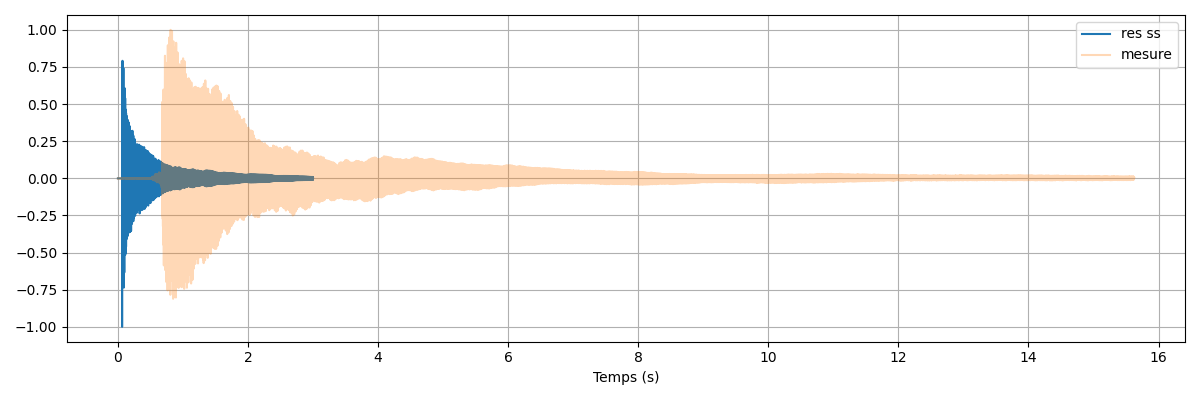

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(np.arange(len(ss_simu))/fs,ss_simu/np.max(np.abs(ss_simu)),label="res ss")
ax1.plot(np.arange(len(C1P1mat["acc_t"]))/fs,C1P1mat["acc_t"]/np.max(np.abs(C1P1mat["acc_t"])),label="mesure", alpha=0.3)
# ax1.plot(np.arange(len(art_acc))/fs,art_acc/np.max(np.abs(art_acc)),label="res article")
ax1.grid()
ax1.legend()
ax1.set_xlabel("Temps (s)")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

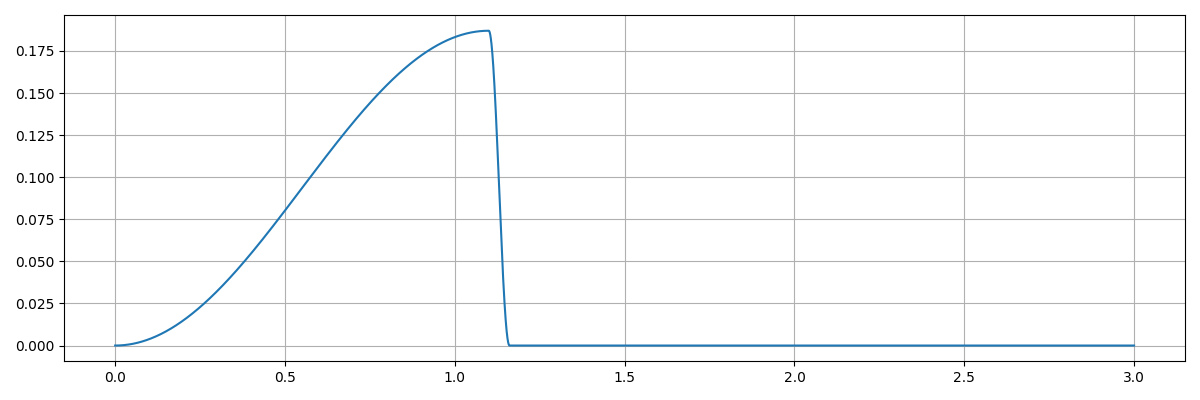

In [10]:
Fe = 2**14

t = np.arange(len(art_acc))/Fe

Fext = np.zeros_like(t)

fm = 0.187 #d'après analyse force d'un plectre ulysse
t1 = int(1.1*Fe) #indice du temps où l'on lâche la corde
t2 = t1 + 1000 #indice du temps où la force repasse à 0 (fin du glissement du plectre sur la corde) : à modéliser, 100 pour le moment

Fext[:t1] = fm/2 * (1 - np.cos(np.pi*t[:t1]/t[t1]))
Fext[t1:t2] = fm/2 * (1 + np.cos(np.pi*(t[t1:t2]-t[t1])/(t[t2]-t[t1])))

fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.scatter(t,Fext,label="", s=0.3)
ax1.plot(t,Fext)
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

In [7]:
import numpy as np

T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0] 
Nx = 20
Ny = 20
Lx, Ly = 0.4,0.3
x = np.linspace(0,Lx, Nx)
y = np.linspace(0,Ly, Ny)

NB = 5
MB = 5
NmB = NB*MB

X_plate, Y_plate = np.meshgrid(x, y)
X_ravel, Y_ravel = np.ravel(X_plate), np.ravel(Y_plate)

def omega_pq (p,q, h, E_nu, rho, Lx, Ly) :
        return np.sqrt(E_nu*h**2/(12*rho)) * ((p*np.pi/Lx)**2+(q*np.pi/Ly)**2)


## Calcul des modes
wnB = np.zeros(NmB)
NmB_idx = np.zeros((2,NmB))   #Cette liste permet de remonter du mode contracté "i" au mode réel (n_i,m_i) en appelant NmB_idx[:,i]
j = 0
for n in range(1,NB+1) :
    for m in range(1,MB+1) :
        wnB[j] = omega_pq(n,m, h, E_nu,rhoT,Lx,Ly)
        NmB_idx[0,j] = n
        NmB_idx[1,j] = m
        j += 1

### Tri par ordre de fréquences croissantes
tri_idx = np.argsort(wnB)

wnB = wnB[tri_idx]    #On range les pulsations par ordre croissant
fnB = wnB/2/np.pi
# print(fnB)
NmB_idx = NmB_idx[:,tri_idx]      #On ordonne les modes par ordre croissant
#print(f"Fréquence du dernier mode de plaque calculé : {fnB[-1]:.0f} Hz")

def phi_pq (p,q,x,y, Lx, Ly) :  #Calcul analytique des déformées des modes d'une plaque en appuis simple
        return np.sin(p*np.pi*x/Lx)*np.sin(q*np.pi*y/Ly)

### Déformées
phiB_NxNy_NmB = np.zeros((Nx*Ny,NmB)) #Matrice des déformées avec les 2 dimensions spatiales applaties en 1 dimension
for mode in range (NmB) :
    for point in range(Nx*Ny) :
        n = NmB_idx[0,mode]
        m = NmB_idx[1,mode]
        x_ = X_ravel[point]
        y_ = Y_ravel[point]

        phiB_NxNy_NmB[point,mode] = phi_pq(n, m , x_, y_,Lx,Ly)



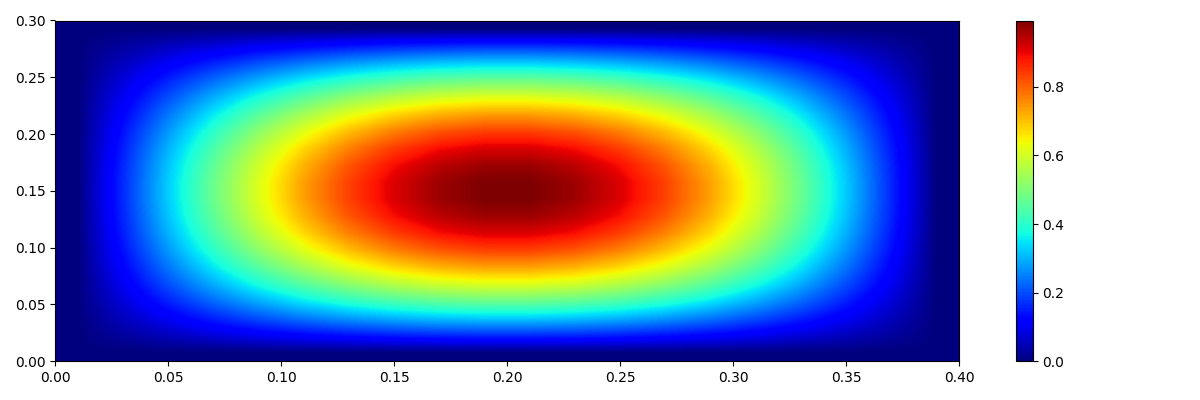

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget
plt.rcParams["figure.figsize"] = (12,4)

fig = plt.figure()
ax1 = fig.add_subplot(111)

img = ax1.imshow(phiB_NxNy_NmB[:,0].reshape(Nx,Ny).T,
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="jet" ,
    interpolation = "bilinear",
    aspect="auto" ,
    origin="lower")

fig.colorbar(img,ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel(r"")
ax1.set_title(r"")

#bonus
#cmap = cm.get_cmap('viridis', 20)    # 11 discrete colors
#ax1.set_xscale("log")

fig.tight_layout()

plt.show()